#### Note: The workbook contains transformations and my interpretation of the data. To clarify the steps taken, a PowerPoint presentation has been put together separately.

#### Loading the three datasets

In [2]:
import pandas as pds   # Pandas is the library that is used for exploration and manipulation for the majority of the study.

Airbnb = pds.read_csv('Airbnb_data_New_York.csv')
Sales = pds.read_csv('Property_sales_data_New_York.csv')
Weather = pds.read_excel('Weather Data.xlsx')

#### Data Exploration

#### Airbnb data

##### Finding columns with missing values in the Airbnb dataset

In [3]:
# Airbnb_data_New_York.csv columns with missing values
cols_missing = Airbnb.columns[Airbnb.isna().any()].tolist()
for col in cols_missing:
    print(f"{col}: {Airbnb[col].isna().sum()} Missing values")

name: 16 Missing values
host_name: 21 Missing values
last_review: 10052 Missing values
reviews_per_month: 10052 Missing values


The findings show that there are multiple missing data points in the four columns: name, host_name, last_review, and reviews_per_month. The columns 'last review' and 'reviews_per_month' will not be useful for analysis due to the large amount of missing data.The column, 'name' contains 16 missing values and column 'host' has 21 missing values; these may not have an impact on the analysis and can be substituted with 'unkown'.

##### Replacing missing values in the columns name and host_name

In [4]:
# Replace missing values in "name" and "host_name" columns with "unkown"
Airbnb["name"].fillna("unkown", inplace=True)
Airbnb["host_name"].fillna("unkown", inplace=True)

##### Deleting columns that are not required

In [5]:
# Remove columns
Airbnb = Airbnb.drop(['id', 'host_id', 'last_review','reviews_per_month'], axis=1)

Columns 'id' and 'host_id' are unique identifiers,hence are not required for analysis

#### Weather data

By looking at the data in the excel file ,it may be seen that there are rows in the dataset that may not be necessary for data analysis.

In [6]:
print(Weather.head())

           aggregation    Maximum    Minimum       Mean
0            timestamp        NaN        NaN        NaN
1  2016-09-01 00:00:00  19.216120   9.236119  14.438621
2  2016-09-02 00:00:00  21.106120  11.196119  15.695287
3  2016-09-03 00:00:00  16.056120   4.816119   7.629451
4  2016-09-04 00:00:00  10.626119   2.486119   6.831952


In [7]:
# Deleting the first row
Weather = Weather.iloc[1:]
# Renaming header
Weather = Weather.rename(columns={'aggregation': 'DATE','Maximum': 'MaxTemp', 'Minimum': 'MinTemp','Mean': 'MeanTemp' })
print(Weather.head())

                  DATE    MaxTemp    MinTemp   MeanTemp
1  2016-09-01 00:00:00  19.216120   9.236119  14.438621
2  2016-09-02 00:00:00  21.106120  11.196119  15.695287
3  2016-09-03 00:00:00  16.056120   4.816119   7.629451
4  2016-09-04 00:00:00  10.626119   2.486119   6.831952
5  2016-09-05 00:00:00  11.136119   4.296119   7.336952


#### Property_sales_data_New_York data

In [8]:
# Rename the sale date column
Sales = Sales.rename(columns={'SALE DATE': 'DATE'})

# Changing the date column to date type
Sales['DATE'] = pds.to_datetime(Sales['DATE'])


In [9]:
# Removing duplicates
Sales = Sales.drop_duplicates(keep='last')

In [10]:
# Changing the date column in the Weather dataset to date type
Weather['DATE'] = pds.to_datetime(Weather['DATE'])

print(Weather.head())

        DATE    MaxTemp    MinTemp   MeanTemp
1 2016-09-01  19.216120   9.236119  14.438621
2 2016-09-02  21.106120  11.196119  15.695287
3 2016-09-03  16.056120   4.816119   7.629451
4 2016-09-04  10.626119   2.486119   6.831952
5 2016-09-05  11.136119   4.296119   7.336952


#### Data Analysis

#### 1. Present some of the key findings of the datasets above. 

#### 1(a).	How many properties are sold with zero price? 

In [11]:
#change the data type of price column to numerical values
Airbnb['price'] = pds.to_numeric(Airbnb['price'], errors='coerce')

properties_zeroprice = Airbnb[Airbnb['price'] == 0]

properties_zeroprice.count()[0]

11

#### 1(b). What is the average price for each neighborhood to rent an Airbnb apartment?

In [12]:
# Group the data by neighbourhood
by_neighbourhood = Airbnb.groupby('neighbourhood')

# Calculate the average price for each neighbourhood
avg_price_by_neighbourhood = by_neighbourhood['price'].mean()

print("Average price by neighbourhood:\n", avg_price_by_neighbourhood.sort_values(ascending=False))

Average price by neighbourhood:
 neighbourhood
Fort Wadsworth    800.000000
Woodrow           700.000000
Tribeca           490.638418
Sea Gate          487.857143
Riverdale         442.090909
                     ...    
New Dorp           57.000000
Soundview          53.466667
Tremont            51.545455
Hunts Point        50.500000
Bull's Head        47.333333
Name: price, Length: 221, dtype: float64


We can also have a broader view by calculating average price by the neighbouthood group as seen below.

In [13]:
# Group the data by neighbourhood_group
by_neighbourhoodgroup = Airbnb.groupby('neighbourhood_group')

# Calculate the average price for each neighbourhood
avg_price_by_neighbourhoodgroup = by_neighbourhoodgroup['price'].mean()

print("Average price by neighbourhoodgroup:\n", avg_price_by_neighbourhoodgroup.sort_values(ascending=False))

Average price by neighbourhoodgroup:
 neighbourhood_group
Manhattan        196.872305
Brooklyn         124.383207
Staten Island    114.812332
Queens            99.517649
Bronx             87.496792
Name: price, dtype: float64


Text(0, 0.5, 'Average Price')

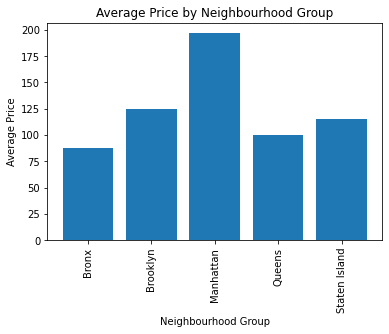

In [14]:
# Plotting a bar chart
import seaborn as sns
import matplotlib.pyplot as plt
plt.bar(avg_price_by_neighbourhoodgroup.index, avg_price_by_neighbourhoodgroup)
plt.xticks(rotation=90)
plt.title('Average Price by Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Average Price')

#### 1(c).	What are the number of sales of properties in each neighborhood in NY?

In [24]:
numofsales_by_neighbourhood = Airbnb.groupby('neighbourhood')['price'].count().reset_index()
print('Number of property sales by neighbourhood:')
print(numofsales_by_neighbourhood)

Number of property sales by neighbourhood:
       neighbourhood  price
0           Allerton     42
1      Arden Heights      4
2           Arrochar     21
3            Arverne     77
4            Astoria    900
..               ...    ...
216  Windsor Terrace    157
217        Woodhaven     88
218         Woodlawn     11
219          Woodrow      1
220         Woodside    235

[221 rows x 2 columns]


In [16]:
numofsales_by_neighbourhood = Airbnb['neighbourhood'].value_counts()
print(numofsales_by_neighbourhood)

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
                      ... 
Fort Wadsworth           1
Richmondtown             1
New Dorp                 1
Rossville                1
Willowbrook              1
Name: neighbourhood, Length: 221, dtype: int64


#### Number of sales of properties in each neighbourhood_group in NY

In [22]:
numofsales_by_neighbourhoodgroup = Airbnb['neighbourhood_group'].value_counts()
print(numofsales_by_neighbourhoodgroup)

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64


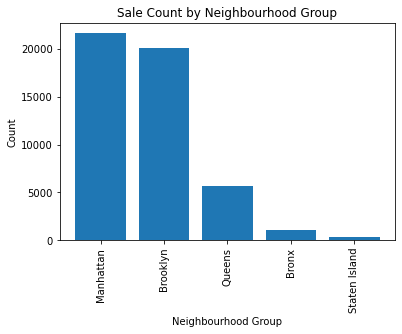

In [23]:
# Plotting a bar chart
plt.bar(numofsales_by_neighbourhoodgroup.index, numofsales_by_neighbourhoodgroup.sort_values(ascending=False))
plt.xticks(rotation=90)
plt.title('Sale Count by Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Count')
plt.show()

#### 1(d). Are sales of properties in NY impacted by the weather temperatures?

#### Merging all three datasets

In [51]:
# Merge 'Sales' and 'Weather' data
SalesnWeather = pds.merge(Sales, Weather, on='DATE')
print(SalesnWeather.head(1))

   Unnamed: 0  BOROUGH   NEIGHBORHOOD  \
0           4        1  ALPHABET CITY   

                       BUILDING CLASS CATEGORY TAX CLASS AT PRESENT  BLOCK  \
0  07 RENTALS - WALKUP APARTMENTS                                2A    392   

   LOT EASE-MENT BUILDING CLASS AT PRESENT       ADDRESS  ...  \
0    6                                  C2  153 AVENUE B  ...   

  LAND SQUARE FEET  GROSS SQUARE FEET  YEAR BUILT  TAX CLASS AT TIME OF SALE  \
0             1633               6440        1900                          2   

   BUILDING CLASS AT TIME OF SALE SALE PRICE       DATE    MaxTemp   MinTemp  \
0                              C2    6625000 2017-07-19  15.606119  6.616119   

    MeanTemp  
0  11.567784  

[1 rows x 25 columns]


In [52]:
Airbnb = Airbnb.rename(columns={'neighbourhood':'NEIGHBORHOOD'})
print(Airbnb.head(1))

                                 name host_name neighbourhood_group  \
0  Clean & quiet apt home by the park      John            Brooklyn   

  NEIGHBORHOOD  latitude  longitude     room_type  price  minimum_nights  \
0   Kensington  40.64749  -73.97237  Private room    149               1   

   number_of_reviews  calculated_host_listings_count  availability_365  
0                  9                               6               365  


In [53]:
# Change all the values in column 'neighnourhood'  to uppercase
Airbnb['NEIGHBORHOOD'] = Airbnb['NEIGHBORHOOD'].str.upper()

In [54]:
# Merge 'Airbnb' and 'SalesnWeather' data
mergedata = pds.merge(Airbnb, SalesnWeather, on='NEIGHBORHOOD')
print(mergedata.head(1))

                                 name host_name neighbourhood_group  \
0  Clean & quiet apt home by the park      John            Brooklyn   

  NEIGHBORHOOD  latitude  longitude     room_type  price  minimum_nights  \
0   KENSINGTON  40.64749  -73.97237  Private room    149               1   

   number_of_reviews  ...  LAND SQUARE FEET  GROSS SQUARE FEET  YEAR BUILT  \
0                  9  ...             14309               1960        1972   

   TAX CLASS AT TIME OF SALE BUILDING CLASS AT TIME OF SALE SALE PRICE  \
0                          4                             G5    5625000   

        DATE    MaxTemp   MinTemp   MeanTemp  
0 2017-07-19  15.606119  6.616119  11.567784  

[1 rows x 36 columns]


In [55]:
corr = mergedata[['price', 'MeanTemp']].corr()
corr

,price,MeanTemp
price,1.000000,-0.000425
MeanTemp,-0.000425,1.000000


In [56]:
#Correlation between sale price and average temperature
correlation = mergedata['price'].corr(mergedata['MeanTemp'])
print(f'Correlation between price and average temperature: {correlation}')

Correlation between price and average temperature: -0.0004251980896732046



#### 2. If you were supposed to buy an apartment in New York, what would be your approach to find the best investment if you plan to use it for Airbnb?

Below are steps involved in my approach to find the best investment to buy an apartment in NY and use it for an Airbnb:

1.Budget: Determine your investment limit, including property costs, renovations, and ongoing expenses.

2.Research: Identify tourist-friendly neighborhoods with demand for short-term rentals.

3.Regulations: Understand local Airbnb regulations and legal requirements.

4.Profitability: Focus on areas with higher Airbnb rates than long-term rentals.

5.Agent: Engage a local real estate agent experienced in Airbnb investments.

6.Property Features: Seek properties near attractions, with good access and layout.

7.Condition: Assess property condition and potential renovation costs.

8.ROI: Calculate projected return on investment considering income and expenses.

9.Financials: Review property taxes, HOA fees, and insurance costs.

10.Building Rules: Check for building restrictions on short-term rentals.

11.Management: Decide on self-management or hiring a property management company.

12.Legal and Tax: Consult legal and tax professionals for proper structuring.

13.Due Diligence: Conduct inspections, title searches, and contract reviews.

14.Negotiate: Work with the agent to negotiate a favorable purchase.

15.Listing: Create an attractive Airbnb listing for a great guest experience.

Lastly, it is important to stay adaptable and informed about market trends for a successful investment.